In [1]:
from enderscope import Stage, Panel
from serial_utils import serial_ports
print (serial_ports())

['/dev/tty.Bluetooth-Incoming-Port', '/dev/tty.usbserial-142130']


In [2]:
s = Stage(serial_ports()[1], 115200, homing=False)

In [3]:
p = Panel(s)

GridspecLayout(children=(Button(description='Up', layout=Layout(grid_area='widget001', height='auto', width='a…

Output()

In [4]:
p.recorded_positions

[(103.43, 129.96, 32.06),
 (118.43, 129.96, 32.06),
 None,
 (118.43, 119.96, 32.06),
 None,
 None]

In [5]:
for i in range(5):
    for pos in p.recorded_positions:
        s.move_position(pos)
        s.finish_moves()
        

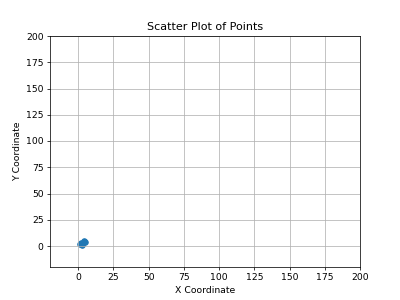

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from IPython.display import display, Image

# Define an array of coordinates
points = np.array([
    [1, 2],
    [2, 3],
    [3, 1],
    [4, 5],
    [5, 4],
])

# Split the array into x and y coordinates
x_coords = points[:, 0]
y_coords = points[:, 1]

# Create a BytesIO object to save the plot
buf = BytesIO()

# Set the desired resolution
desired_width = 400
desired_height = 300

# Calculate DPI
fig_width_in = 6  # width in inches
fig_height_in = 4.5  # height in inches
dpi = min(desired_width / fig_width_in, desired_height / fig_height_in)

# Create a scatter plot with specified size
plt.figure(figsize=(fig_width_in, fig_height_in))
plt.scatter(x_coords, y_coords)
plt.title('Scatter Plot of Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)

# Set the axis limits
plt.xlim(-20, 200)
plt.ylim(-20, 200)

# Save the plot to the BytesIO object with specified resolution
plt.savefig(buf, format='png', dpi=dpi)
plt.close()

# Display the image
display(Image(data=buf.getvalue(), format='png'))